<a href="https://colab.research.google.com/github/robinmkc/Coursera_Capstone/blob/main/data_scientist_capstone_week3_part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Week 3: Segmenting and Clustering Neighborhoods in Toronto
For this assignment, you will be required to explore and cluster the neighborhoods in Toronto.

# This is Part 1 of Week 3 project



Install beautifulsoup4

In [1]:
!pip install bs4

Import pandas, requests, and BeautifulSoup

In [2]:
import pandas as pd 
import requests 
from bs4 import BeautifulSoup 

Read URL and parse it to table_contents

In [3]:

url = 'https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=1012118802'
#url = 'https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M'
req = requests.get(url) 
soup = BeautifulSoup(req.content, 'html.parser')
table = soup.find_all('table')[0]
table_contents = pd.read_html(str(table))

From table_contents, find table and convert data to pandas dataframe base on the requirements

In [4]:
data = []
table = soup.find('table')
#print(table)
table_body = table.find('tbody')

rows = table_body.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    if(isinstance(cols, list) and len(cols) > 2):
        #Check if Borough is not assigned
        if('Not assigned') in cols[1]:
            #Borough is not assigned.
            #Skip appending
            pass
        else:
            #Keep row if Borough is assigned.
            #If a cell has a borough but a Not assigned neighborhood, 
            #then the neighborhood will be the same as the borough.
            if('Not assigned') in cols[2]:
                cols[2] = cols[1]  
            data.append([ele for ele in cols if ele]) # Get rid of empty values

df=pd.DataFrame(data)

df.columns =['PostalCode', 'Borough', 'Neighborhood']
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})
df

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


Read number of rows and columns from dataframe

In [5]:
df.shape



(103, 3)

# This is Part 2 of Week 3 project



In [6]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv'
geo_df = pd.read_csv(url)
geo_df = geo_df.rename(columns={"Postal Code": "PostalCode"})

new_df = pd.merge(df, geo_df)
new_df

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


# This is Part 3 of Week 3 project



In [17]:
from geopy.geocoders import Nominatim
address = 'Toronto, Canada'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto, Canada are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of Toronto, Canada are 43.6534817, -79.3839347.


In [18]:
import folium
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(new_df['Latitude'], new_df['Longitude'], new_df['Borough'], new_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [19]:
toronto_data = new_df[new_df['Borough'].str.contains('Toronto')].reset_index(drop=True)
toronto_data.shape

(40, 5)

Define Foursquare Credentials and Version

In [20]:
CLIENT_ID = 'TEEZ1B2SQPVUVYJMHJG4GSIHM5OZ5XCQKPRIV42Y3OXT3T3T' # your Foursquare ID
CLIENT_SECRET = 'R12H02DVQC5UNWISV2TWZ5HSRBLDIMXK4D0NYT2GVHM2AQ05' # your Foursquare Secret
VERSION = '20180604' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: TEEZ1B2SQPVUVYJMHJG4GSIHM5OZ5XCQKPRIV42Y3OXT3T3T
CLIENT_SECRET:R12H02DVQC5UNWISV2TWZ5HSRBLDIMXK4D0NYT2GVHM2AQ05


Get the neighborhood's name.

In [24]:
neighborhood = toronto_data.loc[1, 'Neighborhood']
latitude = toronto_data.loc[1, 'Latitude']
longitude = toronto_data.loc[1, 'Longitude']
print('Neighborhood={}'.format(neighborhood))
print('Latitude={}'.format(latitude))
print('Longitude={}'.format(longitude))

Neighborhood=Queen's Park, Ontario Provincial Government
Latitude=43.6623015
Longitude=-79.3894938


In [26]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60b47bd12a3aee6c484c1381'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4b9d206bf964a520e69136e3-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d163941735',
         'name': 'Park',
         'pluralName': 'Parks',
         'primary': True,
         'shortName': 'Park'}],
       'id': '4b9d206bf964a520e69136e3',
       'location': {'address': 'University Ave.',
        'cc': 'CA',
        'city': 'Toronto',
        'country': 'Canada',
        'crossStreet': 'at Wellesley Ave.',
        'distance': 283,
        'formattedAddress': ['University Ave. (at Wellesley Ave.)',
         'Toronto ON M5R 2E8',
         'Canada'],
        'labeledLatLngs': [{'l

function that extracts the category of the venue

In [29]:
# function that extracts the category of the venue
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Queen's Park,Park,43.663946,-79.392180
1,Nando's,Portuguese Restaurant,43.661728,-79.386391
2,Mercatto,Italian Restaurant,43.660391,-79.387664
3,NEO COFFEE BAR,Coffee Shop,43.660130,-79.385830
4,T-Swirl Crepe,Creperie,43.663452,-79.384125
5,Bar Volo,Beer Bar,43.665462,-79.385692
6,The Yoga Sanctuary,Yoga Studio,43.661499,-79.383636
7,Tokyo Sushi,Sushi Restaurant,43.665885,-79.386977
8,Starbucks,Coffee Shop,43.659456,-79.390411
9,Central YMCA,Distribution Center,43.663083,-79.385025


Explore Neighborhoods in Toronto



In [32]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )


Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Runnymede, The Junction, Weston-Pellam Park, Carlton Village
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West,  Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Har

Let's check the size of the resulting dataframe

In [36]:
toronto_venues.shape

(1601, 7)

Let's check how many venues were returned for each neighborhood

In [34]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,58,58,58,58,58,58
"Brockton, Parkdale Village, Exhibition Place",22,22,22,22,22,22
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",14,14,14,14,14,14
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",15,15,15,15,15,15
Central Bay Street,60,60,60,60,60,60
Christie,15,15,15,15,15,15
Church and Wellesley,78,78,78,78,78,78
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,32,32,32,32,32,32


Let's find out how many unique categories can be curated from all the returned venues

In [37]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 234 uniques categories.


Analyze Each Neighborhood

In [38]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,...,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
toronto_onehot.shape

(1601, 234)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [40]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,...,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.017241,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.017241,0.051724,0.000000,0.000000,0.00,0.017241,0.017241,0.000000,0.034483,0.000000,0.000000,0.017241,0.000000,0.000000,0.000000,0.000000,0.00000,0.017241,0.000000,0.000000,0.00000,...,0.000000,0.034483,0.000000,0.017241,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.017241,0.00,0.000000,0.000000,0.017241,0.000000,0.000000,0.000000,0.000000,0.00,0.017241,0.000000,0.00,0.000000,0.000000,0.017241,0.000000,0.000000,0.00000,0.00000,0.00000,0.00,0.017241,0.000000,0.000000,0.000000,0.000000,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,0.045455,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.090909,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,"Business reply mail Processing Centre, South C...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.071429,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.071429,0.00,0.000000,0.000000,0.000000,0.00000,0.071429,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.000000,0.000000,0.066667,0.066667,0.133333,0.2,0.133333,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.066667,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Central Bay Street,0.016667,0.000000,0.000000,0.000000,0.000000,0.0

In [41]:
toronto_grouped.shape

(40, 234)

In [43]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
          venue  freq
0   Coffee Shop  0.10
1  Cocktail Bar  0.07
2        Bakery  0.05
3      Pharmacy  0.03
4   Cheese Shop  0.03


----Brockton, Parkdale Village, Exhibition Place----
               venue  freq
0               Café  0.14
1        Coffee Shop  0.09
2     Breakfast Spot  0.09
3  Convenience Store  0.05
4      Burrito Place  0.05


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
                  venue  freq
0  Gym / Fitness Center  0.07
1         Garden Center  0.07
2           Pizza Place  0.07
3                  Park  0.07
4            Restaurant  0.07


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
              venue  freq
0   Airport Service  0.20
1  Airport Terminal  0.13
2    Airport Lounge  0.13
3             Plane  0.07
4  Sculpture Garden  0.07


----Central Bay Street----
                venue  freq
0         Coffee Shop  0.1

put that into a pandas dataframe

In [48]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.*italicized text*

In [51]:
import numpy as np # library to handle data in a vectorized manner
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Bakery,Beer Bar,Farmers Market,Seafood Restaurant,Pharmacy,Cheese Shop,Restaurant,Japanese Restaurant
1,"Brockton, Parkdale Village, Exhibition Place",Café,Breakfast Spot,Coffee Shop,Performing Arts Venue,Restaurant,Stadium,Bakery,Intersection,Italian Restaurant,Climbing Gym
2,"Business reply mail Processing Centre, South C...",Light Rail Station,Fast Food Restaurant,Park,Burrito Place,Brewery,Garden Center,Gym / Fitness Center,Comic Shop,Pizza Place,Restaurant
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Terminal,Airport Lounge,Boat or Ferry,Rental Car Location,Plane,Harbor / Marina,Bar,Airport Food Court,Airport
4,Central Bay Street,Coffee Shop,Café,Italian Restaurant,Sandwich Place,Thai Restaurant,Japanese Restaurant,Salad Place,Bank,Burger Joint,Bubble Tea Shop
5,Christie,Grocery Store,Café,Park,Nightclub,Restaurant,Candy Store,Italian Restaurant,Baby Store,Coffee Shop,Dog Run
6,Church and Wellesley,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Gay Bar,Restaurant,Yoga Studio,Men's Store,Pub,Hotel,Fast Food Restaurant
7,"Commerce Court, Victoria Hotel",Coffee Shop,Restaurant,Café,Hotel,Italian Restaurant,Gym,Deli / Bodega,Japanese Restaurant,American Restaurant,Cocktail Bar
8,Davisville,Dessert Shop,Sandwich Place,Pizza Place,Gym,Café,Italian Restaurant,Sushi Restaurant,Coffee Shop,Pharmacy,Brewery
9,Davisville North,Hotel,Sandwich Place,Park,Department Store,Breakfast Spot,Food & Drink Shop,Gym / Fitness Center,Playground,Dance Studio,Dessert Shop


Run k-means to cluster the neighborhood into 5 clusters.

In [54]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [55]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,Coffee Shop,Park,Bakery,Breakfast Spot,Restaurant,Café,Pub,Theater,Mexican Restaurant,Shoe Store
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0,Coffee Shop,Sushi Restaurant,Yoga Studio,Bank,Beer Bar,Smoothie Shop,Sandwich Place,Salad Place,Burrito Place,Café
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0,Clothing Store,Coffee Shop,Café,Middle Eastern Restaurant,Cosmetics Shop,Italian Restaurant,Japanese Restaurant,Hotel,Bubble Tea Shop,Electronics Store
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Coffee Shop,Café,Cocktail Bar,Gastropub,Hotel,Moroccan Restaurant,Italian Restaurant,Park,Restaurant,Cosmetics Shop
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,2,Health Food Store,Pub,Trail,Women's Store,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run


Finally, let's visualize the resulting clusters

In [57]:

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

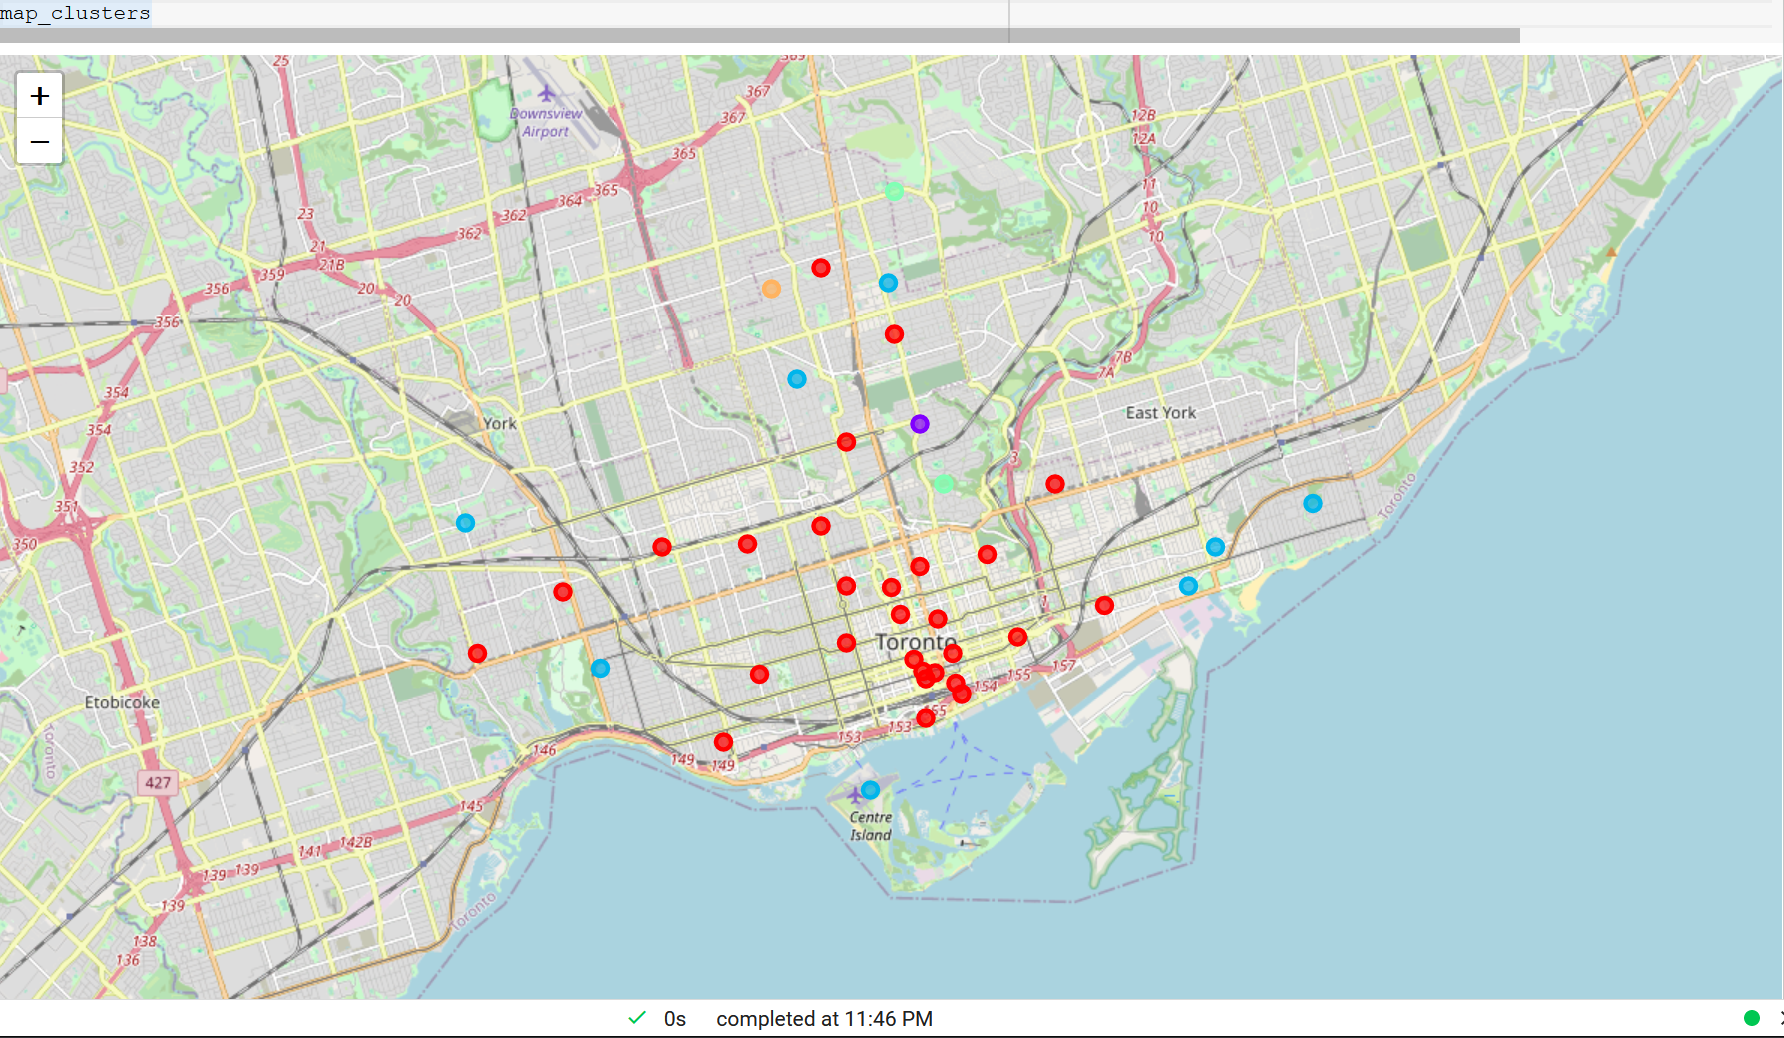